<a href="https://colab.research.google.com/github/Geetika2282/NLP-AI/blob/main/8016_NLP_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [99]:
image = cv2.imread('/content/drive/MyDrive/sample.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [100]:
median_fil = cv2.medianBlur(image, 5)
gauss_fil = cv2.GaussianBlur(image, (5, 5), 1) # (image, (filter size), standard deviation)

In [101]:
median_fil_rgb = cv2.cvtColor(median_fil, cv2.COLOR_BGR2RGB)
gauss_fil_rgb = cv2.cvtColor(gauss_fil, cv2.COLOR_BGR2RGB)

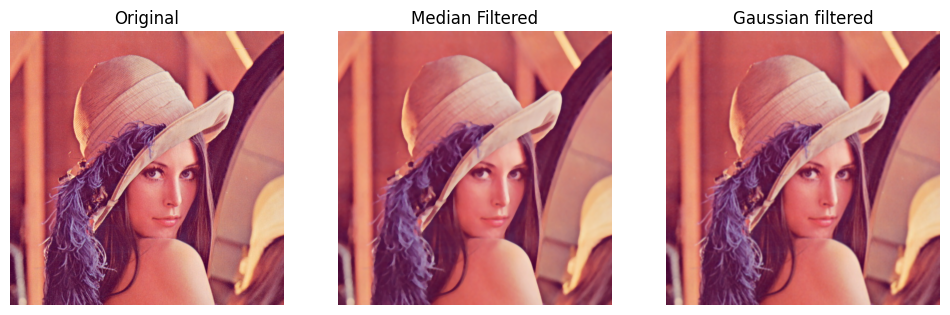

In [102]:
plt.figure(figsize = (12, 4))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

# Median filtered image
plt.subplot(1, 3, 2)
plt.imshow(median_fil_rgb)
plt.title("Median Filtered")
plt.axis("off")

# Gaussian filtered image
plt.subplot(1, 3, 3)
plt.imshow(gauss_fil_rgb)
plt.title("Gaussian filtered")
plt.axis("off")

plt.show()

In [103]:
# save those images to a file
cv2.imwrite("med_fil.jpg", median_fil)
cv2.imwrite("gauss_fil.jpg", gauss_fil)

True

# Q 2


In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [105]:
image = cv2.imread('/content/drive/MyDrive/sample.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [106]:
# Apply the Sobel operator to detect vertical and horizontal edges
# vertical edges
sobel_x = cv2.Sobel(gray_i, cv2.CV_64F, 1, 0, ksize=3)

# horizontal
sobel_y = cv2.Sobel(gray_i, cv2.CV_64F, 0, 1, ksize=3)

# combine
edges = cv2.magnitude(sobel_x, sobel_y)

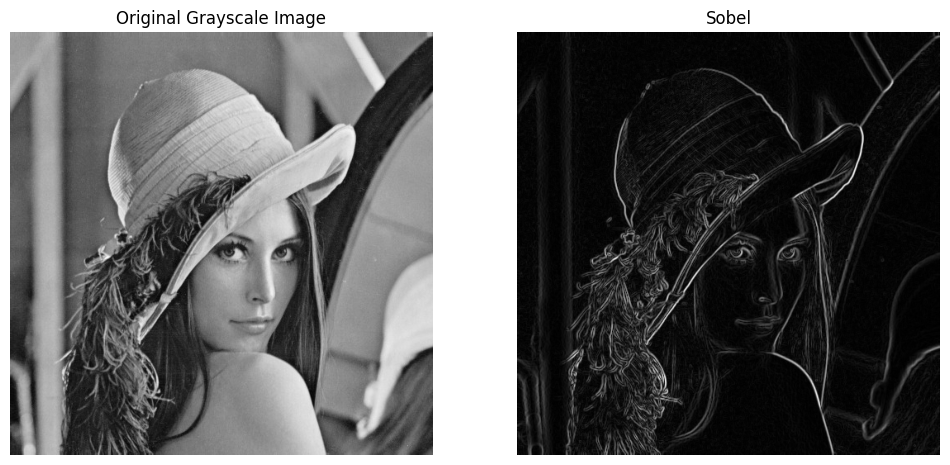

In [107]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_i, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Edge-detected
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Sobel')
plt.axis('off')

plt.show()

In [108]:
# save the edge-detected image
cv2.imwrite('edge_detected.jpg', edges)

True

In [109]:
!pip install nltk gensim pandas

In [110]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from gensim.models import Word2Vec
import pandas as pd

In [111]:
# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Answer 3

In [112]:
# Step 1: Read the content of the sample.docx file
file_path = '/content/drive/MyDrive/sample.txt.docx'
doc = Document(file_path)
text = ' '.join([paragraph.text for paragraph in doc.paragraphs])  # Extract text from paragraphs

In [113]:
# Step 2: Tokenization
tokens = word_tokenize(text)

In [114]:
# Step 3: Remove punctuation
tokens = [word for word in tokens if word not in string.punctuation]

In [115]:
# Step 4: Convert text to lowercase
tokens = [word.lower() for word in tokens]

In [116]:
# Step 5: Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

In [117]:
# Step 6: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

In [118]:
# Display the results
print("Original Text:\n", text)
print("\nTokenized Words:\n", tokens)
print("\nFiltered Tokens (No Stop Words):\n", filtered_tokens)
print("\nLemmatized Tokens:\n", lemmatized_tokens)

Original Text:
   The names "John Doe" for males, "Jane Doe" or "Jane Roe" for females, or "Jonnie Doe" and "Janie Doe" for children, or just "Doe" non-gender-specifically are used as placeholder names for a party whose true identity is unknown or must be withheld in a legal action, case, or discussion. The names are also used to refer to acorpse or hospital patient whose identity is unknown. This practice is widely used in the United States and Canada, but is rarely used in other English-speaking countries including the United Kingdom itself, from where the use of "John Doe" in a legal context originates. The names Joe Bloggs or John Smith are used in the UK instead, as well as in Australia and New Zealand.  John Doe is sometimes used to refer to a typical male in other contexts as well, in a similar manner to John Q. Public, known in Great Britain as Joe Public, John Smith or Joe Bloggs. For example, the first name listed on a form is often John Doe, along with a fictional address or

In [119]:
# Optionally, write the preprocessed tokens to a file
with open('preprocessed_text.txt', 'w') as output_file:
    output_file.write(' '.join(lemmatized_tokens))

print("\nPreprocessed text saved to 'preprocessed_text.txt'.")


Preprocessed text saved to 'preprocessed_text.txt'.


# Q 4

In [120]:
!pip install pandas scikit-learn nltk

In [121]:
import pandas as pd
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [122]:
# Download necessary NLTK resources
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords


In [123]:
# Step 1: Load the IMDB dataset
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [136]:
#  4.1: Preprocess the text
def preprocess_text(text):
    # Remove special characters, convert to lowercase
    text = re.sub(r"`<.*?>", '', text)  # Remove HTML tags if any
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert text to lowercase
    return text

# Apply the text preprocessing to the review column
df['review'] = df['review'].apply(preprocess_text)

In [137]:
# 4.2.2: Tokenization and Padding
# We can use CountVectorizer to tokenize and vectorize the text
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), max_features=5000)

X = vectorizer.fit_transform(df['review'])  # Convert reviews to a matrix of token counts
y = np.where(df['sentiment'] == 'positive', 1, 0)  # Convert sentiment to 1 for positive, 0 for negative

In [138]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [139]:
# 4.3: Build a binary classification model
# You can choose either Logistic Regression or Naive Bayes.
# Here, we use Naive Bayes as an example.

model = MultinomialNB()  # Naive Bayes classifier
model.fit(X_train, y_train)

MultinomialNB()

In [140]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

In [141]:
type(y_pred)

numpy.ndarray

In [142]:
# 4.4 Save predictions to a CSV file
# predictions_df = pd.DataFrame({'review': df['review'].iloc[y_test.index], 'Predicted Sentiment': y_pred})
predictions_df = pd.DataFrame({'review': df['review'].iloc[y_test], 'Predicted Sentiment': y_pred})
predictions_df.to_csv('predictions.csv', index=False)

In [143]:
# Step 7: Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the accuracy and confusion matrix
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 84.79%
Confusion Matrix:
[[4225  736]
 [ 785 4254]]


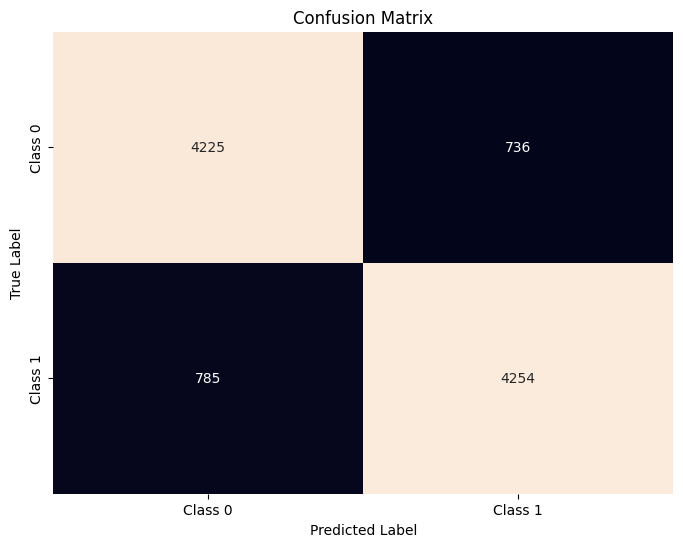

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',  cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
